# London Bike Sharing Exploratory Data Analysis

<img src="London_Bike_Sharing.png" width="800" />

# Introduction

https://www.pbsc.com/about-us

# Preparation

**Loading the relevant libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

**Tasks**

* Analyzing bike sharing in London from 2015 to 2016
* Comparing bike sharing rentals on holidays to rentals on weekends and weekdays

**Loading the data**

Loading the London bike sharing dataset into DataFrame

In [2]:
df=pd.read_csv(r"C:\Users\Orly\Documents\python projects\london_merged.csv")

In [10]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,0,1,3


**Data Shape**

In [3]:
print(f'This frame has {df.shape[0]} rows over {df.shape[1]} columns')

This frame has 17414 rows over 10 columns


**Sampling some rows**

In [12]:
df.sample(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
3524,31/05/2015 04:00,79,12.0,12.0,88.0,15.0,7,0,1,0
1765,18/03/2015 15:00,1106,8.0,5.0,73.5,17.0,2,0,0,0
4807,23/07/2015 22:00,1014,19.0,19.0,54.0,11.0,2,0,0,1


**Data Dictionary**

* **timestamp**-  date and time
* **cnt**- the count of a new bike sharing
* **t1**- real temperature in C
* **t2**- temperature in C "feels like"
* **hum**- humidity in percentage
* **wind_speed**- wind speed in km/h
* **weather_code**- category of the weather
* **is_holiday**- boolean field - 1 holiday / 0 non holiday
* **is_weekend**-  boolean field - 1 if the day is weekend
* **season**- category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
*"weather_code" category description:
    
1 = Clear; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity,
2 = scattered clouds / few clouds 
3 = Broken clouds
4 = Cloudy 
7 = Rain/ light Rain shower/ Light rain 
10 = rain with thunderstorm
26 = snowfall 
94 = Freezing Fog

# Cleanup

**Null Values**

In [13]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

This dataset doesn't contain any Null values, so further cleanup in this area is not required

**Validating Datatypes**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [15]:
df.drop(['season', 'is_weekend', 'is_holiday', 'weather_code'], axis=1).describe()

,cnt,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063
std,1085.108068,5.571818,6.615145,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


Let's summarize what we have got from the dataset

* Our dataset has 17414 records of bike rentals.
* "t1" - real temperature in C and "t2" - temperature in C "feels like" seems quite same thing, 
needs to look their correlation. 
* We have date object, needs to be adjusted.
* Numerically coded (season and weather_code) variables can be used as a group to see the differences between them.
* 'cnt' : count of bike sharing, will be our target variable to work on it.
* Numerical columns most probably have outliers. (Mean- Median difference, difference between 75% and maximum value, 
difference between 25% and minimum value), we have to check them.

Let's make the necessary adjustments before moving to the analysis part.

**Temperature**

* Let's check the correlation between real temperature and felt temperature
* If correlation is high, we will use one of the highly correlated variable 
to improve our model success.

In [17]:
df['t1'].corr(df['t2'])

0.98834422187658

The correlation is extremely high, so we will use only "t1" - real temperature in C, in our analysis.

**timestamp**

Let's make 'timestamp' a datetime object and use its values to create new columns 
(date, hour, weekday name, weekday number, month features).

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df= df.set_index('timestamp')

In [5]:
df['date']=df.index.date
df['year_month']= df.index.strftime('%Y-%m')
df['year'] = df.index.year
df['month']= df.index.month
df['weekday'] = df.index.strftime("%w")
df['weekday_name'] = df.index.strftime("%A")
df['hour']=df.index.hour

df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year_month,year,month,weekday,weekday_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-04-01,2015-04,2015,4,3,Wednesday,0
2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-04-01,2015-04,2015,4,3,Wednesday,1
2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-04-01,2015-04,2015,4,3,Wednesday,2
2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-04-01,2015-04,2015,4,3,Wednesday,3
2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-04-01,2015-04,2015,4,3,Wednesday,4


In [6]:
print(len(df))

17414


The dataset contains few records from 2017,so let's get rid of them

In [7]:
df=df[df['year']!=2017]


**Duplicates Rows**

In [8]:
print(len(df))

17342


In [9]:
df.nunique()

cnt             3779
t1                73
t2                82
hum              143
wind_speed       103
weather_code       7
is_holiday         2
is_weekend         2
season             4
date             727
year_month        24
year               2
month             12
weekday            7
weekday_name       7
hour              24
dtype: int64

The dataset isn't contained a unique column

In [10]:
df.loc[df['cnt']==0].head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year_month,year,month,weekday,weekday_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7,0,1,0,2015-03-29,2015-03,2015,3,0,Sunday,1


# Univariate Analysis

The columns in the dataset are divide into categorical and quantitative variables:
* **Categorical variable**- season, is_holiday, is_weekend, and Weather_code, t1, hum, wind_speed
* **Quantitative**- cnt

**Season variable**

In [11]:
df['season'].value_counts(normalize=True)

0    0.253373
1    0.252970
2    0.248126
3    0.245531
Name: season, dtype: float64

The dataset contains the almost same number of instances from the four seasons

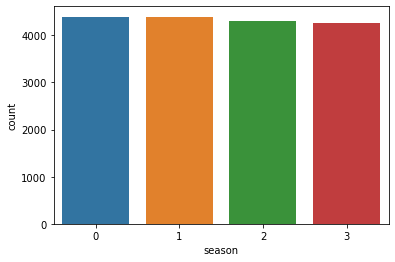

In [12]:
sns.countplot(data=df, x='season')
plt.show()

Text(0.5, 1.0, 'Bike shares by season')

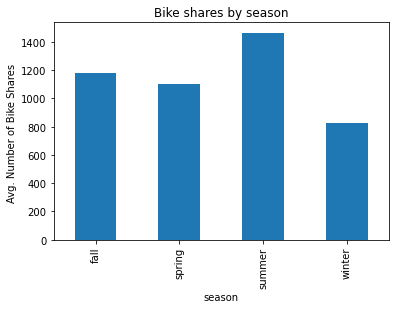

In [13]:
# Plot season vs Avg. Number of BikeShares
# "season" - category field seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

df['season_new'] = df['season'].map({0:"spring", 1:"summer", 2:"fall", 3:"winter"})

df_season =df.groupby(['season_new'])['cnt'].mean()

df_season.plot(kind='bar')
plt.xlabel("season")
plt.ylabel("Avg. Number of Bike Shares ")
plt.title("Bike shares by season")

We can see that the highest bike sharing rentals are during summer and the lowest bike sharing are during the winter which makes sense

**Weather_code variable**

In [14]:
#Number of Bikeshares by Weather condition

# "weather_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

df['weather_code'].value_counts(normalize=True)

1     0.352900
2     0.232211
3     0.204013
7     0.122650
4     0.084016
26    0.003402
10    0.000807
Name: weather_code, dtype: float64

* 35% times, weather_code is clear(1.0)
* 23% times, weather_code is 'scattered clouds, few clouds'
* 20% times, weather code is 'broken clouds'
* 12% times, weather code is 'rain, light rain'

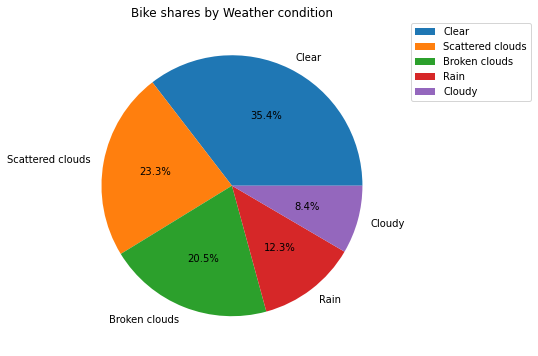

In [15]:
df['weather_code_new']=df['weather_code'].map({1:'Clear', 2:'Scattered clouds', 3:'Broken clouds', 4:'Cloudy', 7:'Rain'})
df['weather_code_new'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

plt.title('Bike shares by Weather condition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axis('off')
plt.show()
plt.close()

Most of the bikes are rented during clear weather, scattered clouds, or broken clouds.

**t1 variable-real temperature in C**

In [16]:
df['t1'].describe()

count    17342.000000
mean        12.500308
std          5.558676
min         -1.500000
25%          8.500000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64

Both mean and median scores are very close to each other. The median is slightly higher than the mean score 
so we can expect a very slightly left-skewed distribution, But the distribution will be very close to a normal distribution
with several outliers.

Let's see

As we expected, quite normal distribution with several outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


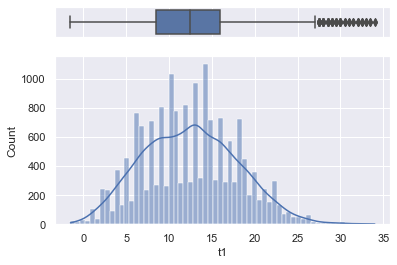

In [17]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['t1'], ax=ax_box)
sns.histplot(data=df, x='t1', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

**Wind speed variable**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


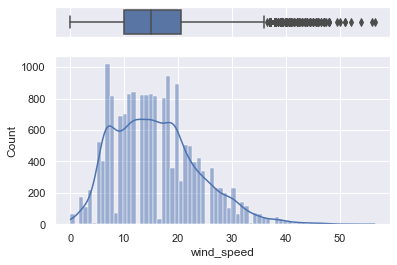

In [18]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['wind_speed'], ax=ax_box)
sns.histplot(data=df, x='wind_speed', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

**Treating outliers**

In [19]:
Q3 = df['wind_speed'].quantile(0.75)
Q1 = df['wind_speed'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(36.25, -5.75)

In [20]:
df=df[(df['wind_speed']>lower)&(df['wind_speed']<upper)]

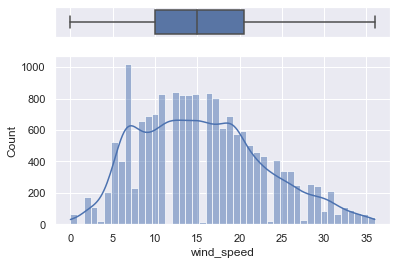

In [21]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data=df, x='wind_speed', ax=ax_box)
sns.histplot(data=df, x='wind_speed', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can see from the graphs that:
* windspeed is normally in the range of 0 to 35
* Avg wind speed is 15
* 25% of wind speed is under 12
* 75% of wind speed is under 20
* Slightly right skewed distribution

**Humidity variable**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


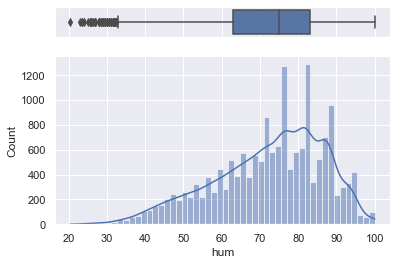

In [22]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['hum'], ax=ax_box)
sns.histplot(data=df, x='hum', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

**Treating outliers**

In [23]:
Q3 = df['hum'].quantile(0.75)
Q1 = df['hum'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(113.0, 33.0)

In [24]:
df=df[(df['hum']>lower)&(df['hum']<upper)]

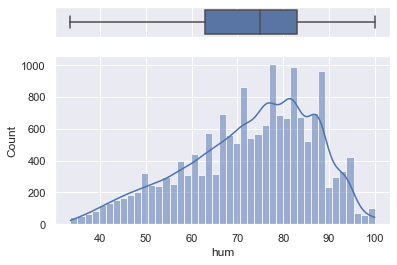

In [25]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data=df, x='hum', ax=ax_box)
sns.histplot(data=df, x='hum', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can see from the graph left-skewed distribution

**CNT variable-Number of new bike shares**

In [26]:
df['cnt'].describe()

count    17020.000000
mean      1140.737897
std       1082.846212
min          0.000000
25%        252.000000
50%        841.000000
75%       1673.000000
max       7531.000000
Name: cnt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


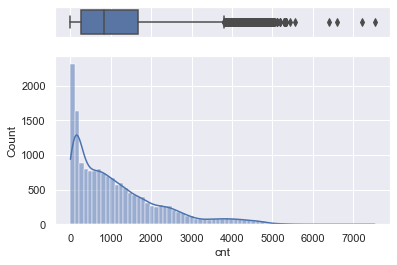

In [27]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['cnt'], ax=ax_box)
sns.histplot(data=df, x='cnt', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can see:
* We have huge difference between mean and median values(mean=1140, median=841)
* Highly right-skewed distribution with the outliers on the maximum side. 

# Bivariate Analysis

**numeric to numeric**

The variables: 't1','hum','wind_speed' are nutural numeric

In [29]:
df[['t1', 'hum','wind_speed', 'cnt']].corr()

,t1,hum,wind_speed,cnt
t1,1.000000,-0.437169,0.160964,0.380943
hum,-0.437169,1.000000,-0.295826,-0.456502
wind_speed,0.160964,-0.295826,1.000000,0.136514
cnt,0.380943,-0.456502,0.136514,1.000000


We can see that:
* There is a positive relationship (.38) between temperature and the number of bike shares.
* There is a negative relationship (.45) between humidity and the number of bike shares.

**categorical to numeric & categorical to categorical**

**Is holiday variable**

Holiday or no?

In [30]:
df['is_holiday'].value_counts()

0    16673
1      347
Name: is_holiday, dtype: int64

Text(0.5, 1.0, 'Bike shares by holidays')

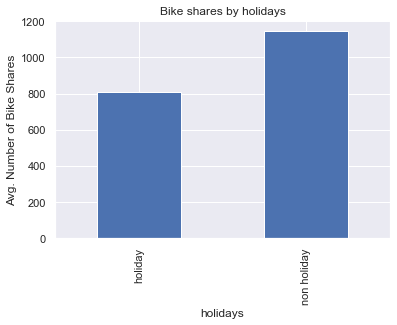

In [31]:
# Plot holidays vs working days
# "is_holiday" - boolean field - 1 holiday / 0 non holiday

df['is_holiday'] = df['is_holiday'].map({0: 'non holiday', 1:'holiday'})

df_holiday =df.groupby(['is_holiday'])['cnt'].mean()

df_holiday.plot(kind='bar')
plt.xlabel('holidays')
plt.ylabel('Avg. Number of Bike Shares')
plt.title('Bike shares by holidays')


We can see that normal days have more bike share than holidays

Text(0.5, 1.0, 'Bike shares by weekdays')

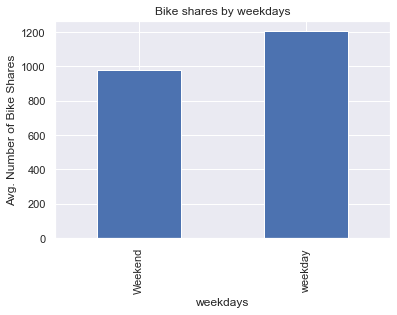

In [32]:
# Plot weekdays vs weekends
# "is_weekend" - boolean field - 1 if the day is weekend

df['is_weekend'] = df['is_weekend'].map({0: 'weekday', 1:'Weekend'})

df_weekdays_vs_weekends =df.groupby(['is_weekend'])['cnt'].mean()

df_weekdays_vs_weekends.plot(kind='bar')
plt.xlabel('weekdays')
plt.ylabel('Avg. Number of Bike Shares')
plt.title('Bike shares by weekdays')

We can see that Weekdays have more bike share than weekends.

**Number of bikes rentals across each season and weather**

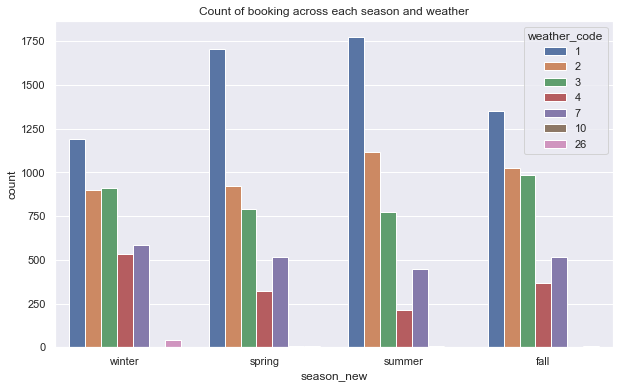

In [33]:
plt.figure(figsize=(10,6))
df['season_new'] = df['season'].map({0:"spring", 1:"summer", 2:"fall", 3:"winter"})

sns.countplot(x='season_new',hue='weather_code',data=df)
plt.title('Count of booking across each season and weather')
plt.show()

We can see from the graph that most of the bikes are rented during summer followed by the spring mostly on good weather days  


**Bike shares by date**

Text(0.5, 1.0, 'Bike shares by Date')

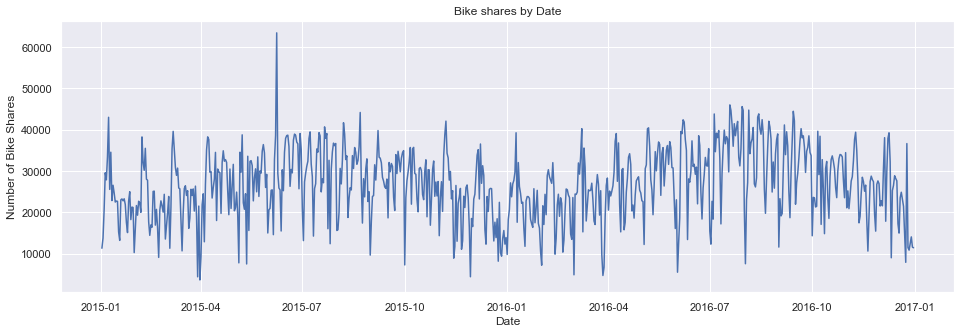

In [34]:
df_date = df.groupby(['date'])['cnt'].sum()
plt.figure(figsize=(16,5))
df_date.plot()
plt.xlabel('Date')
plt.ylabel('Number of Bike Shares')
plt.title('Bike shares by Date')

We can see that:
* During the summertime, there is a significant increase in bike shares.
* On the other hand, during the winter time it decreases significantly. 

**Bike shares by year**

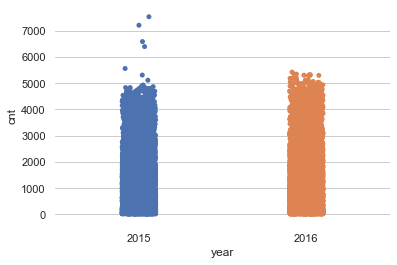

In [35]:
sns.set_style("whitegrid")
sns.stripplot(x='year', y='cnt', data=df)
sns.despine(left=True, bottom=True)

From 2015 to 2016 we can observe a slight decrease in the number of bike shares 

**Bike shares by months**

Text(0.5, 0.98, 'Bike shares by Month')

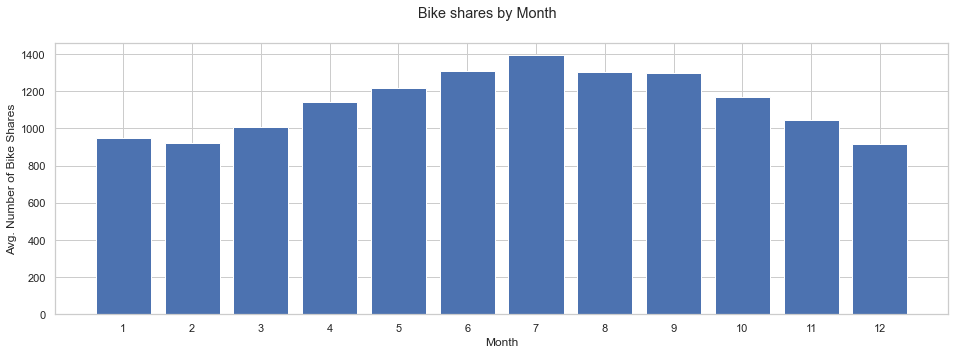

In [36]:
df_month = df.groupby(['month'])['cnt'].mean().round()

plt.figure(figsize=(16,5))
plt.bar(df_month.index, df_month)
plt.xlabel('Month')
plt.ylabel('Avg. Number of Bike Shares')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.suptitle('Bike shares by Month')

We can see that during the summertime, there is significant increase in bike shares and
during the wintertime, it descends respectively

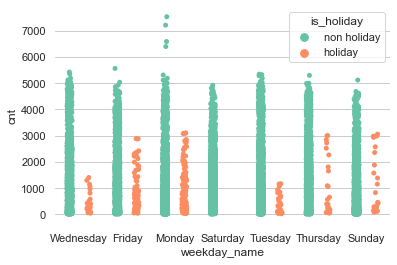

In [37]:
ax = sns.stripplot(x='weekday_name', y='cnt', hue='is_holiday',
                   data=df, palette='Set2', dodge=True)
sns.despine(left=True, bottom=True)

We can see that:
* Most bike rentals are on Monday.
* Almost the same distribution during the weekdays except for Monday

**Bike shares by the time of the day**

Text(0.5, 1.0, 'Bike shares by Time of Day')

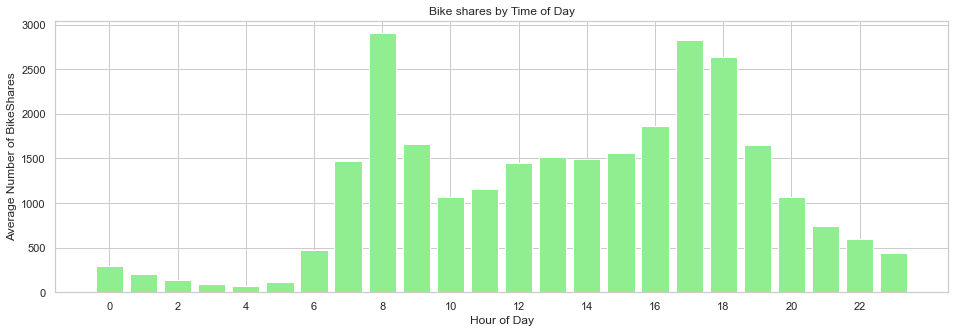

In [38]:
data_hour = df.loc[:, ['hour', 'cnt']]
data_hour_mean = data_hour.groupby('hour')['cnt'].mean().round()

# Plot values calculated above
plt.figure(figsize=(16,5))
plt.bar(data_hour_mean.index, data_hour_mean, color='lightgreen')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of BikeShares')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title('Bike shares by Time of Day')


We can see that:
* The peak hours of bike sharing are Between 8 to 9 AM, and 5 to 6 PM.
* We can assume that those peaks are due to work and school users


**Bike shares by the time of the day on weekday vs weekend**

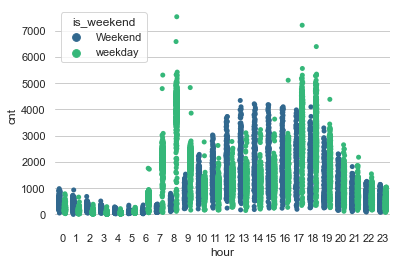

In [39]:
ax = sns.stripplot(x='hour', y='cnt', hue='is_weekend',
                   data=df, palette='viridis', dodge=True)
sns.despine(left=True, bottom=True)


We can see that during the Weekend between 10 AM to 4 PM is the peak time to share a bike

**Bike shares by the time of the day on holiday vs no holiday**

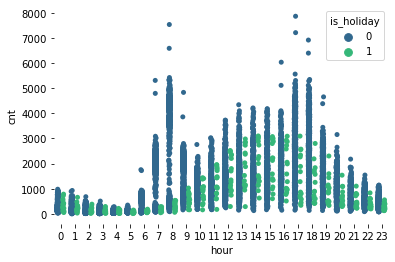

In [11]:
ax = sns.stripplot(x='hour', y='cnt', hue='is_holiday',
                   data=df, palette='viridis', dodge=True)
sns.despine(left=True, bottom=True)

We can see that on holiday the peak hours for bike sharing are between 10 AM to 7 PM. 
Almost like the bike sharing count on the weekend. 

# Recommendation

* From the results, we can conclude that sales will increase in case a discount will be given on the month's Dec, Jan, and Feb 
* Moreover during Working days a discount from 10 AM to 4 PM might increase sales during those hours. As well as adding a refreshment coupon during humid days
* While on holidays and weekends a discount between 6 AM to 8 AM and between 6 PM to 10 PM might increase the sales on those days